In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX/CESM_TAU_0291_.nc')
TAUX1 = data1.variables['TAUX'][0,80:141,-160:]
TAUX2 = data1.variables['TAUX'][0,80:141,:121]
TAUX = np.hstack((TAUX1,TAUX2))
#############################################
lont1 = data1.variables['lon'][-160:]
lont2 = data1.variables['lon'][:121]
lont = np.hstack((lont1,lont2))   # 40W-30E
latt = data1.variables['lat'][80:141] # 70S-55S
############################################
a = np.arange(0,61)
import math
#math.cos(math.radians(latt[:,3][399]))
wholedis = np.zeros(61)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(latt[j]))

In [3]:
# 20-330
years = [f"{x:04d}" for x in range(0,3720)]
ii =0
result330 = np.zeros(3720)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX300/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:141,-160:]
    TAUX2 = data1.variables['TAUX'][0,80:141,:121]
    TAUX = np.hstack((TAUX1,TAUX2))
    lont1 = data1.variables['lon'][-160:]
    lont2 = data1.variables['lon'][:121]
    lont = np.hstack((lont1,lont2))
    latt = data1.variables['lat'][80:141]
    ###### (u2-u1)/(y2-y1)
    a = np.arange(0,60)
    A1= np.zeros([61,281])
    for i in a:
        A1[i,:] = (TAUX[i+1,:]-TAUX[i,:])/(0.25*110.95)
        ###################################
    A3 = A1[0:60,0:280]
        
    result330[ii] = np.nanmean(A3)
    ii = ii + 1

In [4]:
#338-500
years = [f"{x:04d}" for x in range(0,1944)]
ii =0
result500 = np.zeros(1944)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:141,-160:]
    TAUX2 = data1.variables['TAUX'][0,80:141,:121]
    TAUX = np.hstack((TAUX1,TAUX2))
    lont1 = data1.variables['lon'][-160:]
    lont2 = data1.variables['lon'][:121]
    lont = np.hstack((lont1,lont2))
    latt = data1.variables['lat'][80:141]
    ###### (u2-u1)/(y2-y1)
    a = np.arange(0,60)
    A1= np.zeros([61,281])
    for i in a:
        A1[i,:] = (TAUX[i+1,:]-TAUX[i,:])/(0.25*110.95)
        ###################################
    A3 = A1[0:60,0:280]
        
    result500[ii] = np.nanmean(A3)
    ii = ii + 1

In [5]:
#330-337
years = [f"{x:04d}" for x in range(0,96)]
ii =0
result337 = np.zeros(96)
# here PSL is TAUX !!!!!!!
for yy in years:
    data1=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/TAUX/CESM_PSL_'+yy+'_.nc')
    TAUX1 = data1.variables['PSL'][0,80:141,-160:]
    TAUX2 = data1.variables['PSL'][0,80:141,:121]
    TAUX = np.hstack((TAUX1,TAUX2))
    lont1 = data1.variables['lon'][-160:]
    lont2 = data1.variables['lon'][:121]
    lont = np.hstack((lont1,lont2))
    latt = data1.variables['lat'][80:141]
    ###### (u2-u1)/(y2-y1)
    a = np.arange(0,60)
    A1= np.zeros([61,281])
    for i in a:
        A1[i,:] = (TAUX[i+1,:]-TAUX[i,:])/(0.25*110.95)
        ###################################
    A3 = A1[0:60,0:280]
        
    result337[ii] = np.nanmean(A3)
    ii = ii + 1

In [6]:
d1 = result330[1560:]
dd = np.hstack((d1,result337))
ddd = np.hstack((dd,result500))

In [7]:
d4 = ddd.reshape(350,12)
dmean = np.nanmean(d4,axis=1)

In [10]:
dave = np.nanmean(dmean)
fin = dmean - dave

In [11]:
ww2 = np.convolve(fin, np.ones((5,))/5, mode='valid')

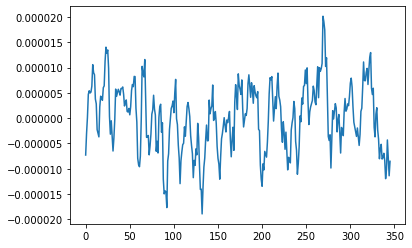

In [12]:
plt.plot(ww2)

In [13]:
np.savetxt('windcurlsmallerregion.out',ww2)